# Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

## Use one sample day as data to plot the aggregation data, one can see an hourly pattern in a day. 

## Use one week of data to plot, one can see a significant pattern within a week. 

## Although, does not see a significant weekly pattern across each month, but the plot shows a growing from Jan to Mar. 

In [1]:
import pandas as pd
from datetime import datetime
import json
from matplotlib import pyplot

with open('ultimate_challenge/logins.json') as f:
    rawlog = json.load(f)
    f.close()
    
rawlog =pd.DataFrame(rawlog)
rawlog['login_time'] = pd.to_datetime(rawlog['login_time'])
rawlog = rawlog.sort_values('login_time')
rawlog['count'] = 1 
logs = rawlog.set_index('login_time')
logs.head()

,count
login_time,
1970-01-01 20:12:16,1
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:36,1
1970-01-01 20:16:37,1


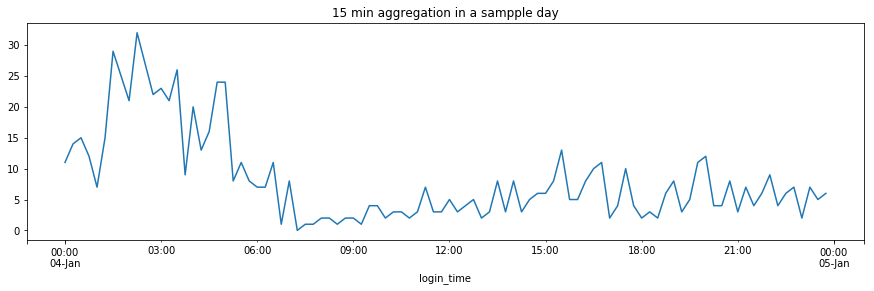

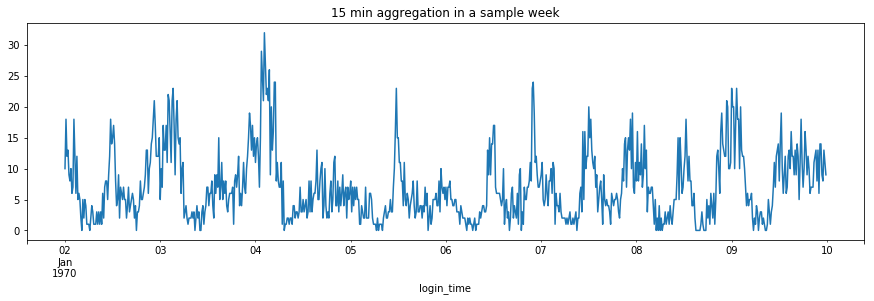

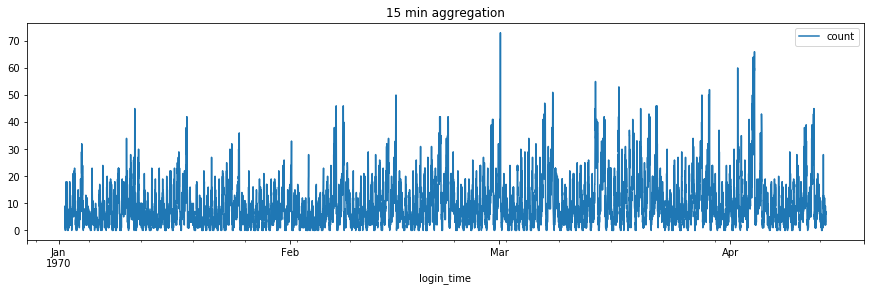

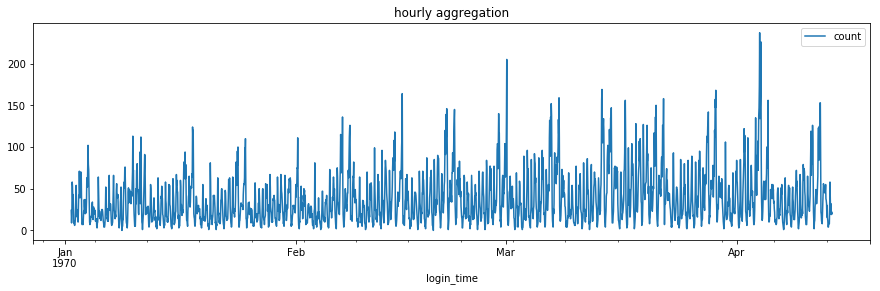

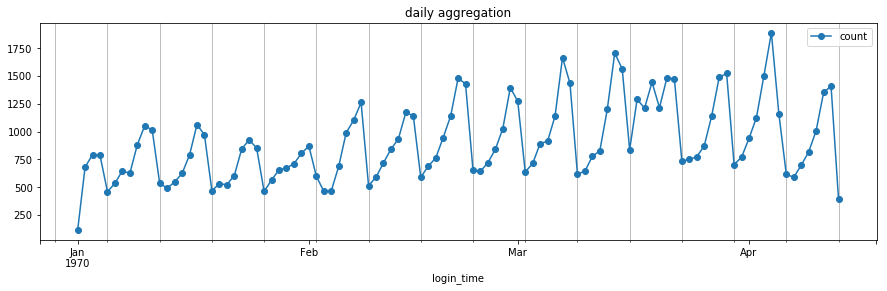

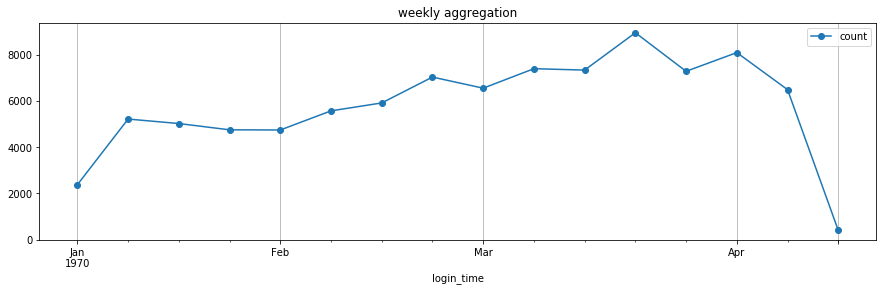

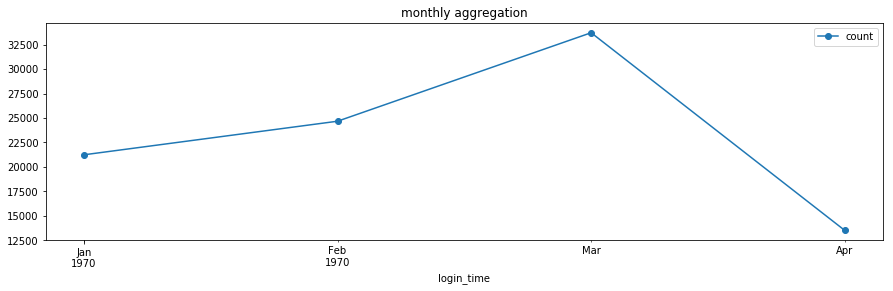

In [2]:
import matplotlib.dates as mdates

#https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects


logs['1970-01-04']["count"].resample("15Min").sum().plot(figsize=(15,4),title="15 min aggregation in a sampple day")
pyplot.show()

logs['1970-01-02':'1970-01-09']["count"].resample("15Min").sum().plot(figsize=(15,4),title="15 min aggregation in a sample week")
pyplot.show()


logs[["count"]].resample("15Min").sum().plot(figsize=(15,4),title="15 min aggregation")

logs[["count"]].resample("H").sum().plot(figsize=(15,4),title="hourly aggregation")

ax = logs[["count"]].resample("D").sum().plot(figsize=(15,4),title="daily aggregation", marker='o')
ax.xaxis.grid(True, which="minor")

ax = logs[["count"]].resample("W").sum().plot(figsize=(15,4),title="weekly aggregation",marker='o')
ax.xaxis.grid(True, which="major")

logs[["count"]].resample("M").sum().plot(figsize=(15,4),title="monthly aggregation", marker='o')
pyplot.show()

# Part 2 ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

## As the toll collection is the manger's reliable data source, The key measure of success should be the increase of the total toll passing.
  
## The trick is, the city manager's tool, without change the physical road structure but encourage more two-way usage, is to reduce the toll or give discount.   Therefore, the count of passing, instead of the total dollar amount from toll will be the better representation. The toll reudce/ discount can then be translated to incentive from the Ultimate manger. 

# EXPERIMENT: TO INCREASE THE BRIDGE TOLL UTILIZATION (INCREASE VEHICLE PASSING THE BRIDGE)

# MATRIC: TOLL PASSING COUNT

# H1:  $sum(x)_t+1 > sum(x)_t$        $x: count $  
# H0:  $sum(x)_t+1 <= sum(x)_t$
    
    
# ASSUMPTION: LOWER THE TOLL PASS OR  GIVE DISCOUNT CAN INCREASE UTILIZATION


## one or more of the following approaches can be adapted: 
0. no discount<br>
1. discount to roundtrip toll passing<br>
2. discount for roundtrip toll passing only when two trips have enough separation time <br>
3. discount for low demand area to high demand area toll passing <br>
4. different discount rate on the selected period and direction <br>

## to compare different policy, randomly select participants from both areas and assign to a chosen group,  use a period time (week to a month) to collect the data, use statistic significance (p-value) as a recommendation.

# Part 3 ‐ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

In [3]:
with open('ultimate_challenge/ultimate_data_challenge.json') as f:
    data_challenge = json.load(f)
    f.close()


In [4]:
df = pd.DataFrame(data_challenge)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
